# How to use the datasets provided by the gan_t2i module

Import from the module `gan_t2i.datasets.DatasetFactory` the `DataFactory`

In [6]:
import os
import sys
import matplotlib.pyplot as plt
import random
import numpy as np

import torchvision.transforms as transforms
from torch.utils.data import DataLoader

module_path = os.path.join(os.getcwd(), '../src')
sys.path.append(module_path)

# Use the DatasetFactory to load the dataset
import gan_t2i.datasets.DatasetFactory as DatasetFactory

For the datasets you can choose how to store it: in memory or by creading a h5 file. The default storing modality, the one that we recommend, is HDF5.

Each field of the dataset is made up by the image as `PIL` image, the caption (the description of the image) as `string` and the class of the image as `integer` number.

You can transform the dataset fields indipendently, this means that you can define a transformation for the image one for the caption and another one for the class.

For example we can convert the images in tensors.

In [7]:
transform_img = transforms.Compose([
    transforms.ToTensor(),
])

## Flowers Dataset

Create the dataset (e.g. the flower dataset)

In [ ]:
# Create a data folder where to store the dataset
data_folder = os.path.join(os.getcwd(), '../data')

# Create the dataset
flower_dataset = DatasetFactory.Flowers(data_folder, transform_img=transform_img)

All the images in the laoded dataset have the resize dimension (in this case 64 x 64 x 3 color channels)

In [ ]:
for idx, (img, cap, class_number) in enumerate(flower_dataset):
    assert img.numpy().shape == (3, 64, 64)  # check the shape of the images
print("All images have the right shape!")

Let's see the dataset length

In [ ]:
print("dataset length: ", len(flower_dataset))

Let's see some images of the dataset with the corresponding caption

image 1 caption: a bright purple flower with sepals in veined fashion
image 2 caption: a flower with white petals and bright yellow pistils in the center.
image 3 caption: this flower is pink and white in color, with petals that are oval shaped.
image 4 caption: the round pointed petals of the flower are yellow orange while the anthers of the flower are also yellow.


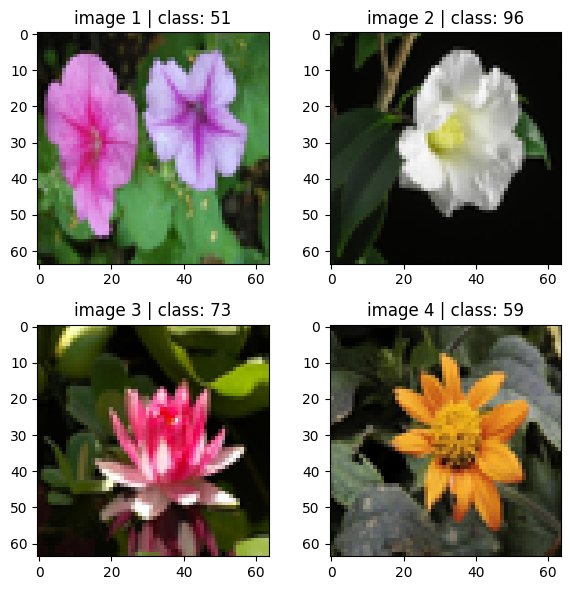

In [6]:
random_indexes = [random.randint(0, len(flower_dataset) - 1) for _ in range(4)]

plt.figure(figsize=(6,6))
for i, d_index in enumerate(random_indexes):
    plt.subplot(2,2,i+1)
    plt.imshow(transforms.ToPILImage()(flower_dataset[d_index][0]))
    plt.title(f"image {i+1} | class: {flower_dataset[d_index][2]}")    
    print(f"image {i+1} caption: {flower_dataset[d_index][1]}")
plt.tight_layout()
plt.show()

## Birds Dataset

Let's now test the birds dataset

In [ ]:
# Create a data folder where to store the dataset
data_folder = os.path.join(os.getcwd(), '../data')

# Create the dataset
birds_dataset = DatasetFactory.Birds(data_folder, resize=(64, 64), transform_img=transform_img)

In [8]:
for idx, (img, cap, class_number) in enumerate(birds_dataset):
    assert img.numpy().shape == (3, 64, 64)  # check the shape of the images
print("All images have the right shape!")

In [9]:
print("dataset length: ", len(birds_dataset))

image 1 caption: this bird is white and black in color, with a long flat beak.
image 2 caption: this small bird has a pudgy yellow belly and a small grey head with a sharp but small pointy beak.
image 3 caption: this bird is yellow with grey and has a very short beak.
image 4 caption: this bird has wings that are black and orange and has a black throat


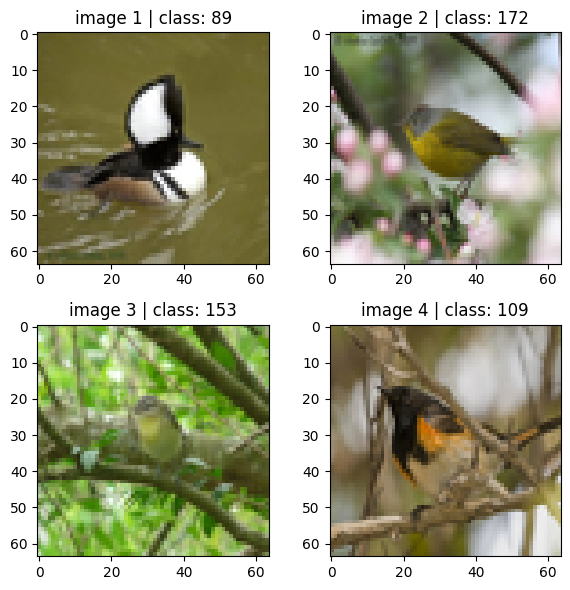

In [10]:
random_indexes = [random.randint(0, len(birds_dataset) - 1) for _ in range(4)]

plt.figure(figsize=(6,6))
for i, d_index in enumerate(random_indexes):
    plt.subplot(2,2,i+1)
    plt.imshow(transforms.ToPILImage()(birds_dataset[d_index][0]))
    plt.title(f"image {i+1} | class: {birds_dataset[d_index][2]}")    
    print(f"image {i+1} caption: {birds_dataset[d_index][1]}")
plt.tight_layout()
plt.show()

## Using Torch DataLoader with the datasets

You can use the provided `DataLoader` of pytorch to load, shuffle, divide into batches, etc... the datasets.

In [18]:
flowers_dataloader = DataLoader(flower_dataset, batch_size=32, shuffle=True)

batch_numbers = 0
for images, captions, class_number in flowers_dataloader:
    batch_numbers += 1
print("Number of batches: ", batch_numbers)

Number of batches:  2560


In [20]:
birds_dataloader = DataLoader(birds_dataset, batch_size=32, shuffle=True)

batch_numbers = 0
for images, captions, class_number in birds_dataloader:
    batch_numbers += 1
print("Number of batches: ", batch_numbers)